In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import random

In [2]:
all_genes = pd.read_csv('extracted_data/GxG_filled.csv', sep = ',', index_col = 0)
all_genes

NxN = pd.read_csv('extracted_data/NxN_imputed.csv', sep = ',', index_col = 0)

R2:  -2.0067666184054898
RMSE: 0.06345994710022561


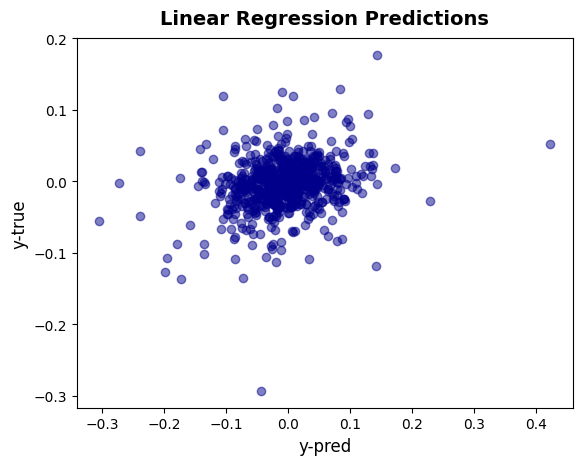

In [3]:
random.seed(35)

target_column = random.choice(NxN.columns)  # Randomly pick a column name

X = NxN.drop(columns=[target_column])  # Features (all columns except the target)
y = NxN[target_column]  # Target variable (the randomly selected column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()


try the same after Running PCA?

0.5358675280295734


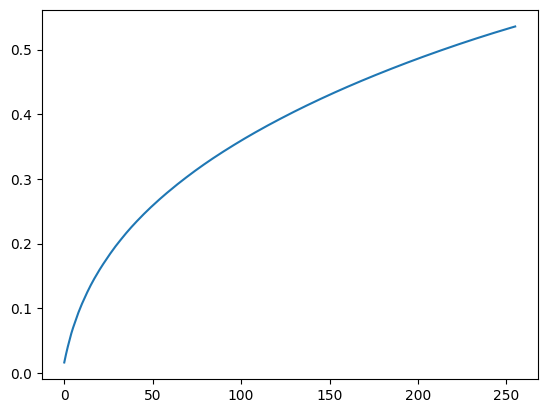

In [4]:
# Check what is the percentage of the variance explained by compressed data compared to the full data 
N=256
pca = PCA(n_components=N)
pca.fit_transform(X)
ev = pca.explained_variance_ratio_.cumsum()
print(ev[-1])
plt.plot(range(0, N), ev)

In [5]:
dims = 256
NxN_PCA = pd.DataFrame(PCA(n_components=dims).fit_transform(X))
NxN_PCA

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.163483,-0.128841,-0.087978,-0.087818,0.179930,-0.036631,0.169732,0.060918,0.140562,-0.214657,...,0.009938,-0.018473,-0.054166,0.016981,-0.146190,0.012766,-0.007561,-0.032000,-0.079530,0.023176
1,0.013931,0.130920,0.006191,-0.013144,-0.067731,-0.056688,0.010161,-0.018673,0.015840,-0.084577,...,-0.116680,0.036707,-0.013158,0.007067,-0.010606,0.036268,-0.001947,-0.016464,0.051127,-0.028147
2,0.403252,0.071636,-0.105931,-0.091099,-0.055568,0.116428,0.132630,-0.214279,0.142003,-0.042109,...,-0.246035,0.070969,0.067363,0.081098,0.028046,0.104501,-0.089942,-0.092033,0.001048,0.068045
3,0.005641,-0.204023,0.171695,0.235296,-0.105818,0.014366,0.204564,0.096591,-0.022670,-0.132856,...,-0.081281,0.132631,0.053031,0.084184,-0.141790,-0.027608,-0.060134,-0.066912,-0.219453,0.214616
4,-0.045344,-0.005019,-0.124516,0.026553,-0.101543,-0.015110,-0.036786,-0.141728,0.097934,-0.039384,...,-0.027776,0.056126,0.015428,-0.004106,-0.063138,-0.072852,-0.006028,0.017782,0.006137,-0.091516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,-0.168644,-0.208412,0.309133,0.163970,-0.157603,0.059219,0.071044,-0.195307,0.006314,0.048729,...,0.136118,0.105231,-0.074652,-0.001221,-0.026421,-0.064577,-0.058256,-0.086473,0.045546,0.155546
3604,-0.108078,-0.067945,0.168782,-0.004933,0.077328,-0.091765,0.041741,-0.109638,0.073308,0.169325,...,0.034521,0.039325,0.004425,-0.013509,-0.035424,0.011146,-0.020412,0.033115,-0.017636,0.060135
3605,-0.465071,-0.133804,0.346690,0.170087,0.092718,-0.003582,-0.002448,-0.168172,0.270495,0.125264,...,0.031306,0.105623,-0.022615,0.036691,0.013604,0.030459,-0.022447,0.023871,-0.061326,-0.008346
3606,-0.022645,-0.173122,0.354198,0.025950,-0.148109,-0.110363,0.003384,-0.087536,0.116624,0.008515,...,0.123747,0.070281,-0.016027,0.097613,-0.074882,0.007064,0.032684,0.008725,-0.070742,0.002452


R2:  0.2138395408120355
RMSE: 0.032449308331727


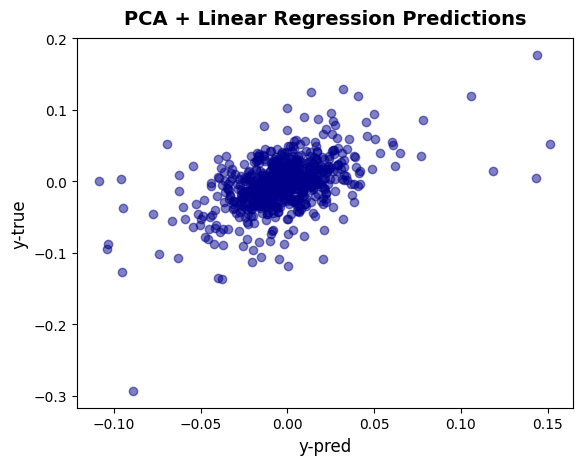

In [6]:
X_train, X_test, y_train, y_test = train_test_split(NxN_PCA, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)


print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("PCA + Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

## Try other models

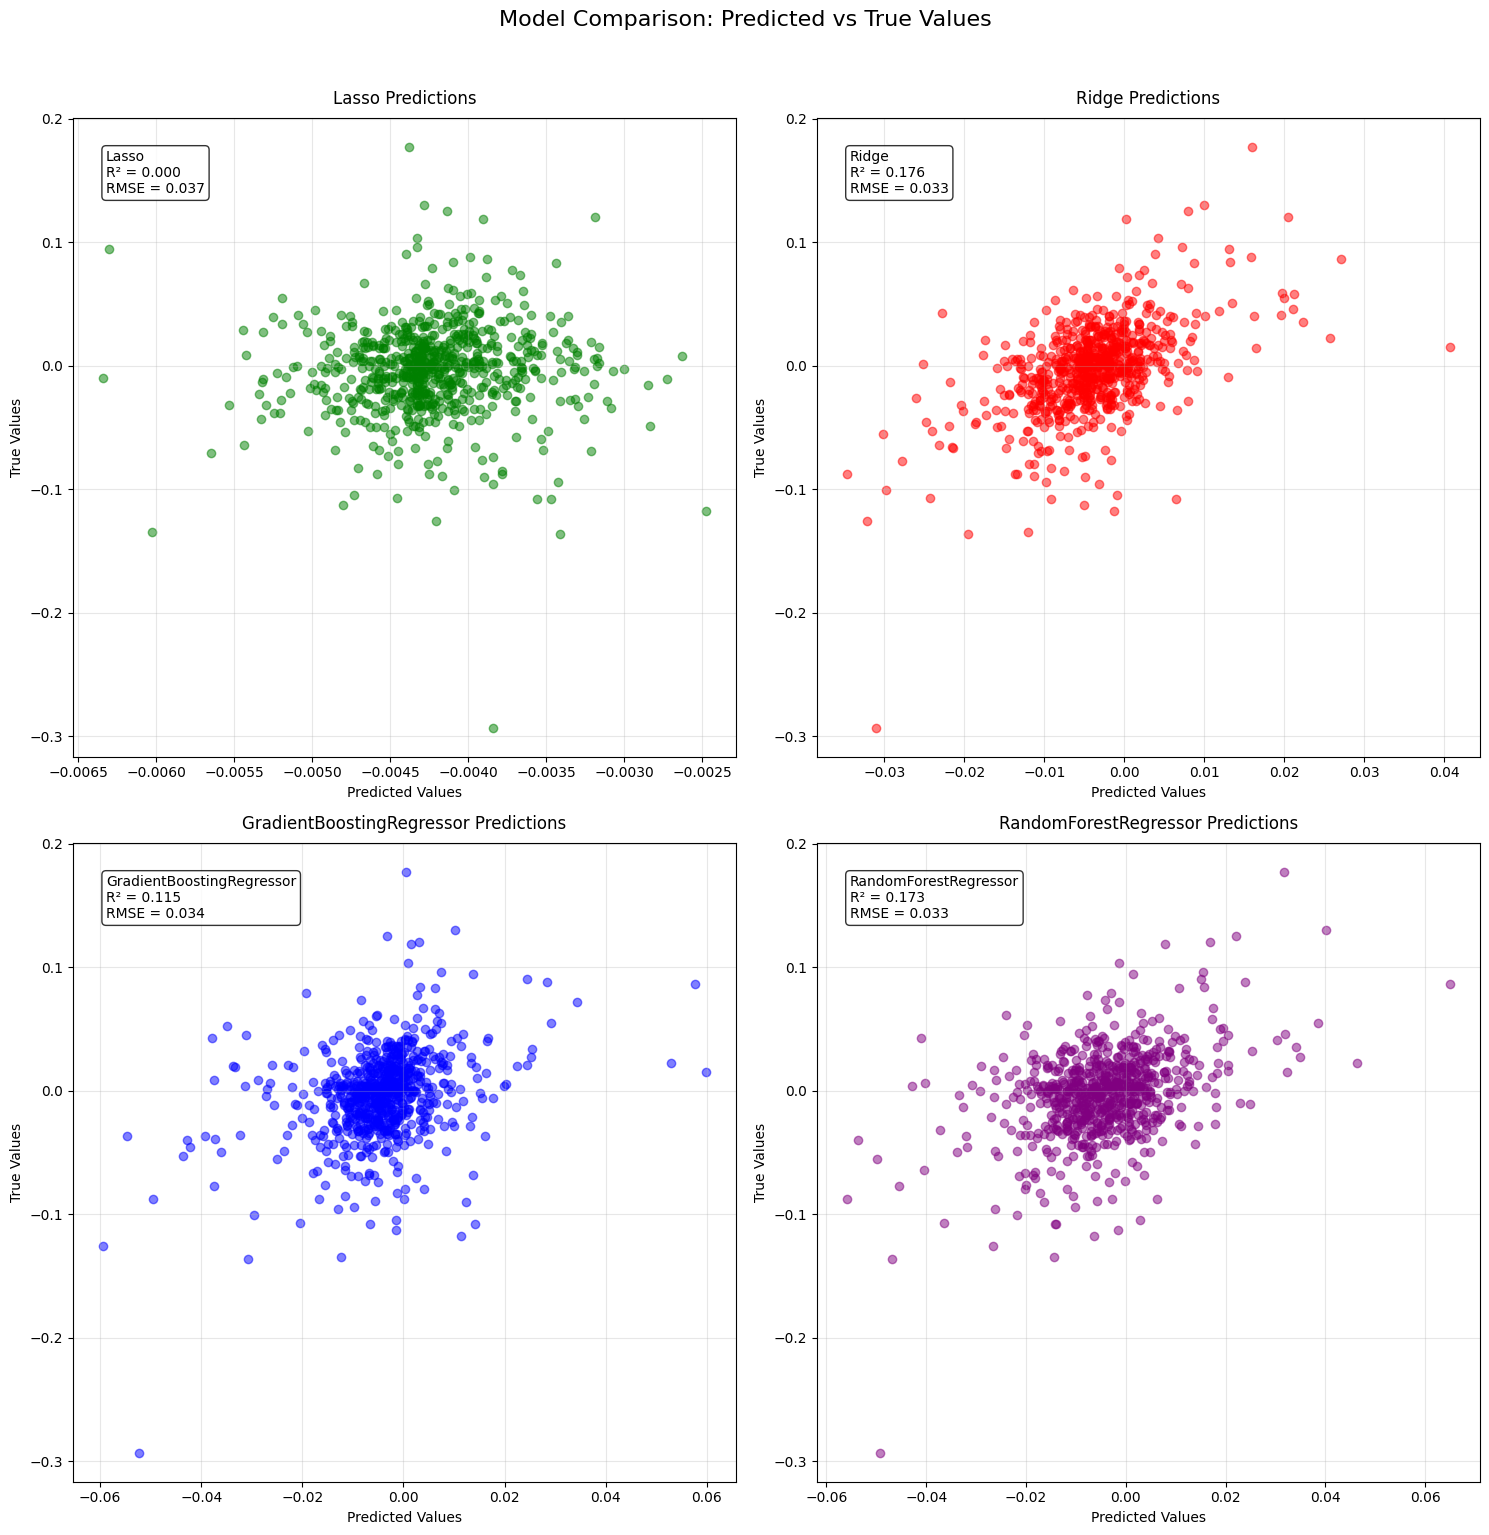

In [7]:
predictive_models = [  
                      Lasso(alpha=0.0004),
                      Ridge(alpha=200.0),
                      GradientBoostingRegressor(n_estimators=20, learning_rate=0.2, max_depth=3, random_state=48),
                      RandomForestRegressor(n_estimators=20, random_state=42)
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Model Comparison: Predicted vs True Values', fontsize=16, y=1.02)

axes = axes.ravel()

colors = ['green', 'red', 'blue', 'purple']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for idx, (model, ax, color) in enumerate(zip(predictive_models, axes, colors)):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    ax.scatter(y_pred, y_test, alpha=0.5, color=color)
        
    model_name = model.__class__.__name__
    ax.text(0.05, 0.95, 
            f'{model_name}\nR² = {r2:.3f}\nRMSE = {rmse:.3f}',
            transform=ax.transAxes,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('True Values')
    ax.set_title(f'{model_name} Predictions', pad=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [8]:
# And Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Neural Network Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

ModuleNotFoundError: No module named 'tensorflow'